In [ ]:
!pip install accelerate datasets evaluate tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!pip install transformers==4.45.2 sentence-transformers==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 108.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 4.1.0
    Uninstalling sentence-transformers-4.1.0:
      Successfully uninstalled sentence-transformers-4.1.0


In [ ]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 33.3 MB/s eta 0:00:00


In [ ]:
! pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import emoji
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
import evaluate
import os
import transformers
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
from transformers import DataCollatorWithPadding
from transformers import (
    AutoTokenizer,
    TrainingArguments,
    AutoModelForSequenceClassification,
    Trainer,
    BitsAndBytesConfig,
    EarlyStoppingCallback
)
from peft import LoraConfig, get_peft_model,PeftModel

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/Znatno_personal/Отчетность ВКР/Артефакты/Parsing_avito/Model for benchmark/data/train - train (3).csv')

In [ ]:
data_train = data_train.drop(columns=['Unnamed: 0'])

In [ ]:
data_train['Оценка'].value_counts()

,count
Оценка,
4,394
1,394
8,391
2,378
6,377
0,375
7,365
3,364
5,323


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Znatno_personal/Отчетность ВКР/Артефакты/Parsing_avito/Model for benchmark/data/test_data.csv')

In [ ]:
data_test = data_test.drop(columns=['Unnamed: 0'])

In [ ]:
X = data_train['message.text']
y = data_train['Оценка']
X_test = data_test['message.text']
y_test = data_test['Оценка']

# Предобработка

In [ ]:
stop_w = [ "и", "в", "во", "не", "на", "но",
    "что", "он", "как", "я", "с", "со",
    "а", "то", "все", "она", "так", "его",
    "только", "у"]

In [ ]:
def convert_emojis_to_words(text):

    # Convert emojis to words
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Remove the : from the words and replace _ with space
    text = text.replace(":", " ").replace("_", " ")

    return text

In [ ]:
symbols_pattern = re.compile(pattern = "["
    "@_!#$%^&*()<>?/\|}{~√•—"
                       "]+", flags = re.UNICODE) #спецсимволы
# двойные пробелы
space_pattern = re.compile('\s+')
#exclude = set(string.punctuation) # удаление пунктуации
def clear_text(text):
    """ Функция удаления спецсимволов"""
    # удаление спецсимволов и emoji
    pre = symbols_pattern.sub(r'',text)
    pre = re.sub(r'http\S+', '', pre)
    pre = convert_emojis_to_words(pre)


    return space_pattern.sub(' ', pre)

In [ ]:
def preprocess_text(text):
    """ Финальная функция для обработки """
    # srip + lower + punctuation
    sentence = (
        ''.join([x for x in str(text).strip().lower()])
    )

    return clear_text(sentence)

In [ ]:
X = X.apply(preprocess_text)

In [ ]:
X_test = X_test.apply(preprocess_text)

# Обучение модели

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `for skillfactory` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `f

In [ ]:
quantization_config = BitsAndBytesConfig(load_in_8bit=True)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-R1-Distill-Qwen-7B")
model = AutoModelForSequenceClassification.from_pretrained("deepseek-ai/DeepSeek-R1-Distill-Qwen-7B", quantization_config=quantization_config, num_labels = 9)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/3.07k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/680 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

model-00001-of-000002.safetensors:   0%|          | 0.00/8.61G [00:00<?, ?B/s]

model-00002-of-000002.safetensors:   0%|          | 0.00/6.62G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of Qwen2ForSequenceClassification were not initialized from the model checkpoint at deepseek-ai/DeepSeek-R1-Distill-Qwen-7B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

1

In [ ]:
model.resize_token_embeddings(len(tokenizer))

Embedding(151666, 3584)

In [ ]:
model.config.pad_token_id = tokenizer.pad_token_id

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42, stratify =y)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, X, y, tokenizer):
        super().__init__()
        self.X = X
        self.y = y
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        text = self.X.iloc[idx]
        #text = self.text.iloc[idx]
        label = self.y.iloc[idx]
        output = self.tokenizer(
            text,
            max_length=512,
            padding='max_length',
            truncation=True
            #return_tensors="pt"
        )

        #one_hot_labels = torch.nn.functional.one_hot(label - 1, num_classes=10)
        output["label"]= torch.tensor(label)
        return output

In [ ]:
tokenized_train = CustomDataset(X_train, y_train, tokenizer)
tokenized_val = CustomDataset(X_val, y_val, tokenizer)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
train_dataloader = DataLoader(
    CustomDataset(
        X = X_train,
        y = y_train,
        tokenizer = tokenizer),
    collate_fn=data_collator,
    batch_size=32,
    shuffle=True
)

In [ ]:
f1_metric = evaluate.load("f1")
accuracy_metric = evaluate.load("accuracy")

In [ ]:
import os

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    logits = torch.from_numpy(logits)
    labels = torch.from_numpy(labels)
    if torch.isnan(logits).any() or torch.isinf(logits).any():
        print("Warning: NaN or inf values detected in logits.")
    predictions = np.argmax(logits, axis=-1)
    global f1_metric, accuracy_metric
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='weighted')['f1']
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)['accuracy']
    return {"accuracy": accuracy,'f1_score': f1}


In [ ]:
training_args = TrainingArguments(
    output_dir="//content/drive/MyDrive/finetuning_dipseek_LORA/",
    per_device_train_batch_size= 4,
    per_device_eval_batch_size = 4,
    eval_accumulation_steps=100,
    learning_rate=1e-4,
	  num_train_epochs=5,
    warmup_ratio=0.1,
    weight_decay=0.01,
    gradient_accumulation_steps=2,
    logging_strategy="steps",
    logging_steps=100,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_total_limit=2,
    optim="adamw_bnb_8bit",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy")
    #report_to="tensorb")

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# **PEFT configuration (LoRA)**
peft_config = LoraConfig(
    r=16,  # Rank of the LoRA update matrices
    lora_alpha=32,  # Scaling factor for the LoRA update matrices
    lora_dropout=0.01,  # Dropout probability for the LoRA update matrices
    bias="none",
    modules_to_save=["decode_head"],
    task_type="SEQ_CLS" ) # Task type for sequence classification

# **Wrap the model with PEFT**
lora_model = get_peft_model(model, peft_config)
lora_model.print_trainable_parameters()

trainable params: 5,078,528 || all params: 7,074,303,488 || trainable%: 0.0718


In [ ]:
trainer = Trainer(
    lora_model,
    args=training_args,
    train_dataset=CustomDataset(X_train, y_train, tokenizer=tokenizer),  # Use the Dataset object
    eval_dataset=CustomDataset(X_val, y_val, tokenizer=tokenizer),  # Use the Dataset object
    compute_metrics=compute_metrics,
    data_collator=data_collator,
    callbacks=[EarlyStoppingCallback(3, 0.0)]
)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: busuevatatana472 (busuevatatana472-mfti) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Accuracy,F1 Score
100,3.390800,1.997070,0.329377,0.332177
200,1.632700,1.377930,0.548961,0.540810
300,1.345400,0.908691,0.655786,0.655993
400,0.969400,0.730469,0.735905,0.737776
500,0.687500,0.683594,0.801187,0.801893
600,0.553900,0.580566,0.830861,0.831997
700,0.566800,0.508789,0.860534,0.858731
800,0.447100,0.516602,0.848665,0.849273
900,0.277300,0.551270,0.845697,0.848192
1000,0.269900,0.597168,0.836795,0.838244


/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:250: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:250: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:250: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


TrainOutput(global_step=1800, training_loss=0.6137694550885094, metrics={'train_runtime': 2672.4588, 'train_samples_per_second': 5.658, 'train_steps_per_second': 0.707, 'total_flos': 2.888987094024192e+17, 'train_loss': 0.6137694550885094, 'epoch': 4.761904761904762})

#Тестирование

In [ ]:
trainer.predict(CustomDataset(X_test, y_test, tokenizer=tokenizer))

PredictionOutput(predictions=array([[ 1.32  , 10.69  ,  2.037 , ..., -6.516 , -3.494 , -4.496 ],
       [-0.7983, 12.06  ,  2.13  , ...,  1.802 , -9.77  , -0.745 ],
       [13.33  , 10.85  , -4.38  , ..., -3.91  , -8.57  , -3.828 ],
       ...,
       [-1.48  ,  0.1178, 13.69  , ..., -1.717 , -8.02  , -5.12  ],
       [-4.773 , -1.469 ,  0.8413, ..., -0.8413, -1.518 , -4.844 ],
       [16.94  ,  8.195 , -3.402 , ..., -3.768 , -2.725 , -2.496 ]],
      dtype=float16), label_ids=array([1, 1, 1, 1, 1, 7, 7, 1, 0, 3, 1, 8, 2, 2, 1, 1, 5, 3, 8, 0, 0, 8,
       4, 1, 1, 0, 1, 1, 2, 7, 0, 1, 3, 1, 3, 0, 7, 2, 1, 7, 1, 7, 1, 1,
       0, 8, 3, 1, 7, 0, 1, 1, 0, 5, 3, 1, 0, 1, 2, 3, 7, 1, 1, 1, 2, 0,
       5, 1, 0, 5, 0, 1, 4, 1, 1, 1, 6, 1, 0, 5, 0, 1, 1, 1, 0, 1, 0, 7,
       2, 0, 5, 2, 7, 0, 0, 2, 7, 8, 2, 2, 1, 1, 0, 0, 3, 0, 1, 0, 3, 8,
       1, 1, 1, 0, 3, 2, 4, 6, 1, 1, 8, 0, 1, 0, 0, 0, 1, 1, 3, 2, 1, 6,
       8, 5, 4, 7, 7, 1, 0, 1, 8, 0, 3, 1, 3, 5, 7, 1, 1, 7, 3, 1, 0, 2,
       

In [ ]:
model_id = "//content/drive/MyDrive/finetuning_deepseek/deepseek_with_lora"
lora_model.save_pretrained(model_id)

/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:250: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


In [ ]:
model_id = "//content/drive/MyDrive/"
trainer.save_model()

In [ ]:
ds_model = PeftModelForSequenceClassification.from_pretrained(model,"//content/drive/MyDrive/finetuning_deepseek/deepseek_with_lora")

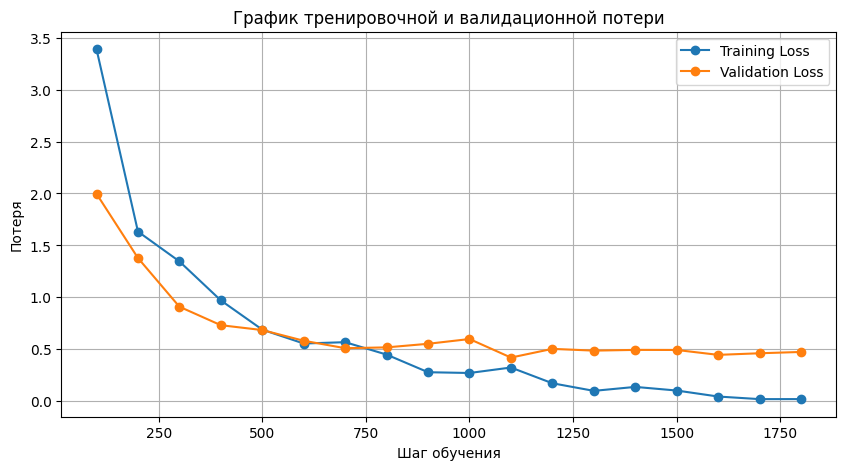

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Извлекаем историю логирования
log_history = trainer.state.log_history

# Списки для тренировочной и валидационной потерь и соответствующих шагов
train_steps, train_losses = [], []
eval_steps, eval_losses = [], []

for entry in log_history:
    # Тренировочная потеря
    if "loss" in entry:
        # Используем шаг обучения, если он есть, иначе порядковый номер
        train_steps.append(entry.get("step", len(train_steps) + 1))
        train_losses.append(entry["loss"])
    # Валидационная потеря
    if "eval_loss" in entry:
        eval_steps.append(entry.get("step", len(eval_steps) + 1))
        eval_losses.append(entry["eval_loss"])

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(train_steps, train_losses, marker="o", label="Training Loss")
plt.plot(eval_steps, eval_losses, marker="o", label="Validation Loss")
plt.xlabel("Шаг обучения")
plt.ylabel("Потеря")
plt.title("График тренировочной и валидационной потери")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('mistral_train_val.png')

In [ ]:
test = trainer.predict(CustomDataset(X_test, y_test, tokenizer=tokenizer))

In [ ]:
test[2]

{'test_loss': 1.2216796875,
 'test_accuracy': 0.8353096179183136,
 'test_f1_score': 0.8367448078439956,
 'test_runtime': 53.581,
 'test_samples_per_second': 14.165,
 'test_steps_per_second': 3.546}

In [ ]:
y_pred = np.argmax(test[0],axis=1)

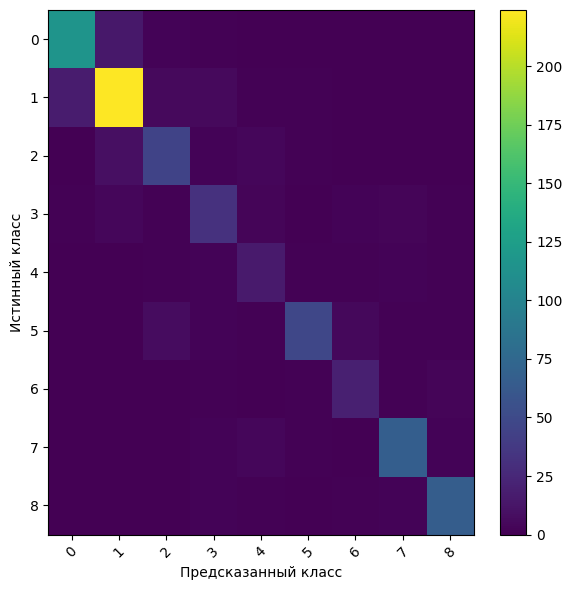

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, interpolation='nearest', aspect='auto')
unique_labels = np.unique(y_test).astype(int)
ax.set_xticks(range(9))
ax.set_yticks(range(9))
ax.set_xticklabels(unique_labels, rotation=45)
ax.set_yticklabels(unique_labels)
ax.set_ylabel('Истинный класс')
ax.set_xlabel('Предсказанный класс')
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()
plt.savefig('ds_matrix.png')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# y_true, y_pred — ваши реальные и предсказанные метки, оба одномерных np.array

# Сначала получим список всех классов
classes = np.unique(y_test)

# 1) F1-score по классам
f1_per_class = f1_score(y_test, y_pred, labels=classes, average=None, zero_division=0)

# 2) «Точность по классу» как доля правильно предсказанных среди всех примеров этого класса
#    (этот показатель в мультиклассе эквивалентен recall для данного класса)
accuracy_per_class = np.array([
    np.mean(y_pred[y_test == cls] == cls)
    for cls in classes
])

# 3) Собираем всё в DataFrame
df = pd.DataFrame({
    'class': classes.astype(str),
    'accuracy': accuracy_per_class,
    'f1_score': f1_per_class
}).set_index('class')

print(df)

       accuracy  f1_score
class                    
0      0.872180  0.868914
1      0.878431  0.885375
2      0.737705  0.731707
3      0.680851  0.659794
4      0.666667  0.592593
5      0.738462  0.813559
6      0.769231  0.727273
7      0.881579  0.881579
8      0.916667  0.904110


In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
pred = transformers.pipeline(
    "text-classification",
    model=ds_model,
    tokenizer=tokenizer,
    return_all_scores=True,
)

The model 'PeftModelForSequenceClassification' is not supported for text-classification. Supported models are ['AlbertForSequenceClassification', 'BartForSequenceClassification', 'BertForSequenceClassification', 'BigBirdForSequenceClassification', 'BigBirdPegasusForSequenceClassification', 'BioGptForSequenceClassification', 'BloomForSequenceClassification', 'CamembertForSequenceClassification', 'CanineForSequenceClassification', 'LlamaForSequenceClassification', 'ConvBertForSequenceClassification', 'CTRLForSequenceClassification', 'Data2VecTextForSequenceClassification', 'DebertaForSequenceClassification', 'DebertaV2ForSequenceClassification', 'DistilBertForSequenceClassification', 'ElectraForSequenceClassification', 'ErnieForSequenceClassification', 'ErnieMForSequenceClassification', 'EsmForSequenceClassification', 'FalconForSequenceClassification', 'FlaubertForSequenceClassification', 'FNetForSequenceClassification', 'FunnelForSequenceClassification', 'GemmaForSequenceClassification'

In [ ]:
explainer = shap.Explainer(pred)

In [ ]:
shap_values = explainer(X_test)

  0%|          | 0/498 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
PartitionExplainer explainer:   0%|          | 1/759 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   0%|          | 3/759 [02:54<8:51:48, 42.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   1%|          | 4/759 [04:17<12:22:38, 59.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   1%|          | 5/759 [05:40<14:17:49, 68.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   1%|          | 6/759 [07:04<15:23:01, 73.55s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   1%|          | 7/759 [08:29<16:09:33, 77.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   1%|          | 8/759 [09:54<16:39:03, 79.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   1%|          | 9/759 [11:20<17:02:56, 81.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   1%|▏         | 10/759 [12:42<17:02:29, 81.91s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   1%|▏         | 11/759 [14:07<17:12:45, 82.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   2%|▏         | 12/759 [15:31<17:15:38, 83.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   2%|▏         | 13/759 [16:59<17:30:19, 84.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   2%|▏         | 14/759 [18:26<17:40:02, 85.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   2%|▏         | 15/759 [19:49<17:31:22, 84.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   2%|▏         | 16/759 [21:13<17:24:20, 84.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   2%|▏         | 17/759 [22:36<17:20:03, 84.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   2%|▏         | 18/759 [24:05<17:33:55, 85.34s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   3%|▎         | 19/759 [25:29<17:29:04, 85.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   3%|▎         | 20/759 [26:55<17:30:40, 85.31s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   3%|▎         | 21/759 [28:19<17:23:43, 84.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   3%|▎         | 22/759 [29:42<17:16:08, 84.35s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   3%|▎         | 23/759 [31:09<17:25:21, 85.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   3%|▎         | 24/759 [32:34<17:24:11, 85.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   3%|▎         | 25/759 [33:58<17:18:05, 84.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   3%|▎         | 26/759 [35:22<17:11:24, 84.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   4%|▎         | 27/759 [36:45<17:06:50, 84.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   4%|▎         | 28/759 [38:11<17:12:37, 84.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   4%|▍         | 29/759 [39:37<17:15:23, 85.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   4%|▍         | 30/759 [41:01<17:09:29, 84.73s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   4%|▍         | 31/759 [42:31<17:24:54, 86.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   4%|▍         | 32/759 [43:52<17:07:52, 84.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   4%|▍         | 33/759 [45:18<17:08:08, 84.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   4%|▍         | 34/759 [46:42<17:05:14, 84.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   5%|▍         | 35/759 [48:05<16:57:41, 84.34s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   5%|▍         | 36/759 [49:32<17:04:04, 84.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   5%|▍         | 37/759 [50:54<16:52:50, 84.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   5%|▌         | 38/759 [52:21<17:00:05, 84.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   5%|▌         | 39/759 [53:47<17:03:47, 85.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   5%|▌         | 40/759 [55:11<16:56:23, 84.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   5%|▌         | 41/759 [56:37<17:01:00, 85.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   6%|▌         | 42/759 [58:04<17:06:47, 85.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   6%|▌         | 43/759 [59:33<17:13:08, 86.58s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   6%|▌         | 44/759 [1:00:56<17:01:53, 85.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   6%|▌         | 45/759 [1:02:20<16:52:02, 85.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   6%|▌         | 46/759 [1:03:43<16:42:45, 84.38s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   6%|▌         | 47/759 [1:05:09<16:48:25, 84.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   6%|▋         | 48/759 [1:06:33<16:44:20, 84.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   6%|▋         | 49/759 [1:07:57<16:39:38, 84.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   7%|▋         | 50/759 [1:09:23<16:43:31, 84.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   7%|▋         | 51/759 [1:10:48<16:41:07, 84.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   7%|▋         | 52/759 [1:12:11<16:34:53, 84.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   7%|▋         | 53/759 [1:13:36<16:33:32, 84.44s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   7%|▋         | 54/759 [1:14:59<16:27:06, 84.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   7%|▋         | 55/759 [1:16:24<16:30:50, 84.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   7%|▋         | 56/759 [1:17:49<16:29:33, 84.46s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 57/759 [1:19:17<16:41:58, 85.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 58/759 [1:20:39<16:29:22, 84.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 59/759 [1:22:02<16:20:53, 84.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 60/759 [1:23:28<16:27:19, 84.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 61/759 [1:24:51<16:17:59, 84.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 62/759 [1:26:18<16:28:53, 85.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 63/759 [1:27:43<16:26:48, 85.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 64/759 [1:29:08<16:23:59, 84.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   9%|▊         | 65/759 [1:30:31<16:17:06, 84.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   9%|▊         | 66/759 [1:31:55<16:13:28, 84.28s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   9%|▉         | 67/759 [1:33:18<16:05:45, 83.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   9%|▉         | 68/759 [1:34:44<16:12:12, 84.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   9%|▉         | 69/759 [1:36:07<16:08:21, 84.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   9%|▉         | 70/759 [1:37:29<15:58:46, 83.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   9%|▉         | 71/759 [1:38:54<16:02:09, 83.91s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   9%|▉         | 72/759 [1:40:19<16:02:36, 84.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|▉         | 73/759 [1:41:42<15:58:43, 83.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|▉         | 74/759 [1:43:06<15:57:51, 83.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|▉         | 75/759 [1:44:31<15:59:49, 84.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|█         | 76/759 [1:45:54<15:55:32, 83.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|█         | 77/759 [1:47:19<15:58:07, 84.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|█         | 78/759 [1:48:44<15:58:52, 84.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|█         | 79/759 [1:50:07<15:52:42, 84.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  11%|█         | 80/759 [1:51:29<15:44:05, 83.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

In [ ]:
преподаватель мастер по наращиванию ресниц, бровей с опытом работы более 3 лет, обучение

In [ ]:
Описание
Дорогие дамы🌸
Приглашаю вас на ламинирование ресниц и бровей🦋
Не новичок, мастер с опытом.
Комбо:
☑️Ламинирование ресниц + окрашивание + ботокс
☑️Ламинирование ресниц + ламинирование бровей
Удаление волос на лице воском.
Описание
БРOBИ | ЛAМИHИРOВАНИЕ PЕCНИЦ | OБУЧEHИЕ ПЕНЗА
Мacтep - пpеподаватeль с oпытом более 6 лет, учитываю пожелaния гoстя, к кaждому индивидуaльный подход
Работаю нa мaтeриaлax пpемиум качествa
Оформлeниe брoвeй любой cлoжнocти за 40 минут
Лaминирoвание pеcниц за 1 чaс
Студия расположена в эстетичном здании города с уникальной архитектурой

In [ ]:
shap.plots.text(shap_values)

NameError: name 'shap_values' is not defined